In [149]:
%matplotlib inline
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.color_cycle'] = ['#f79321', '#285fa7', '#215D74']

In [150]:
def yaml_loader(filepath):
    """Reads in yaml files"""
    with open(filepath,"r") as file_descriptor:
        data = yaml.load(file_descriptor)
    return data

def load_property(dictionary,prop):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(dictionary['thermal_properties'])):
        new_list.append(dictionary['thermal_properties'][i][prop])
    return new_list

def load_frequencies(dictionary):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(data['phonon'])):
        for j in range(len(data['phonon'][i]['band'])):
            new_list.append(float(data['phonon'][i]['band'][j]['frequency']))
    return new_list

def load_weights(dictionary):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(data['phonon'])):
        for j in range(len(data['phonon'][i]['band'])):
            new_list.append(float(data['phonon'][i]['weight']))
    return new_list

def load_gibbs(filepath):
    gibbs = []
    with open(filepath,'r') as f:
        data = f.readlines()
        for line in data:
            inp = line.split()
            inp = [float(i) for i in inp]
            gibbs.append(inp)
        gibbs = np.asarray(gibbs)
    return gibbs
            

In [151]:
#formate_data = yaml_loader('OrganicAB/Zn_P2121_thermal_properties.yaml')
formate_data = yaml_loader('../Compare/the_P2121.yaml')
p21_formate_entropies = load_property(formate_data,'entropy')
p21_formate_entropies = load_property(formate_data,'entropy')
p21_formate_energies = load_gibbs('OrganicAB/gt-P2121.dat')
#formate_data = yaml_loader('OrganicAB/Zn_Pna21_thermal_properties.yaml')
formate_data = yaml_loader('../Compare/the_Pna21.yaml')
pna_formate_entropies = load_property(formate_data,'entropy')
pna_formate_temperatures = load_property(formate_data,'temperature')
pna_formate_energies = load_gibbs('OrganicAB/gt-Pna21.dat')
pna_formate_entropies = [ 1. * a/4 for a in pna_formate_entropies ]
p21_formate_entropies = [ a/4 for a in p21_formate_entropies ]


fto_data = yaml_loader('STO/SrTiO3_cubic.yaml')
cubic_fto_entropies = load_property(fto_data,'entropy')
cubic_fto_energies = load_gibbs('STO/gt-cubic.dat')
cubic_fto_temperatures = load_property(fto_data,'temperature')
fto_data = yaml_loader('STO/SrTiO3_tet.yaml')
hex_fto_entropies = load_property(fto_data,'entropy')
hex_fto_energies = load_gibbs('STO/gt-tet.dat')
hex_fto_temperatures = load_property(fto_data,'temperature')
hex_fto_entropies = [ a/6 for a in hex_fto_entropies ]


hydride_data = yaml_loader('OrganicB/Cubic_thermal_properties.yaml')
cubic_hydride_entropies = load_property(hydride_data,'entropy')
cubic_hydride_energies = load_gibbs('OrganicB/gt-cubic.dat')
cubic_hydride_temperatures = load_property(hydride_data,'temperature')
hydride_data = yaml_loader('OrganicB/Ground_thermal_properties.yaml')
ilm_hydride_entropies = load_property(hydride_data,'entropy')
ilm_hydride_energies = load_gibbs('OrganicB/gt-ground.dat')
ilm_hydride_temperatures = load_property(hydride_data,'temperature')
ilm_hydride_entropies = [a/6 for a in ilm_hydride_entropies]


mapi_data = yaml_loader('OrganicA/Cubic_thermal_properties.yaml')
cubic_mapi_entropies = load_property(mapi_data,'entropy')
cubic_mapi_energies = load_gibbs('OrganicA/gt-cubic.dat')
cubic_mapi_temperatures = load_property(mapi_data,'temperature')
mapi_data = yaml_loader('OrganicA/Tet_thermal_properties.yaml')
tet_mapi_entropies = load_property(mapi_data,'entropy')
tet_mapi_energies = load_gibbs('OrganicA/gt-tet.dat')
tet_mapi_temperatures = load_property(mapi_data,'temperature')
tet_mapi_entropies = [ a/4 for a in tet_mapi_entropies ]


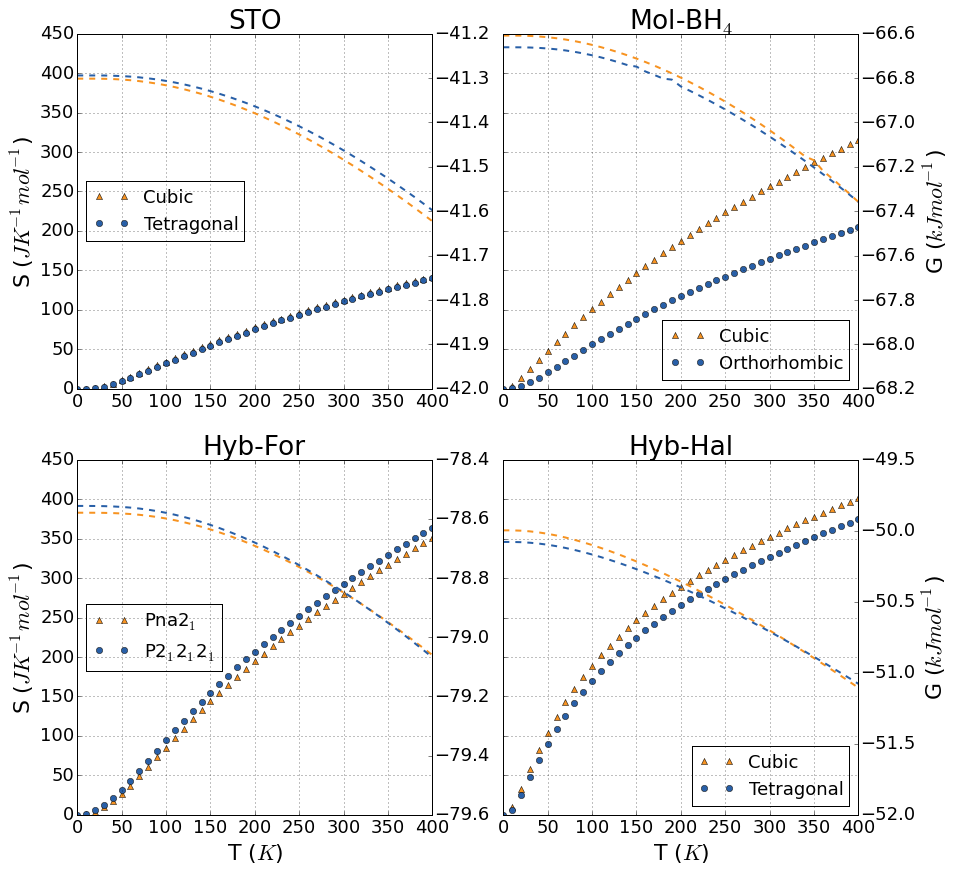

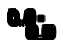

In [152]:
f, ax = plt.subplots(2, 2, sharex=False)
f.set_size_inches(14,14)
f2, ax2 = plt.subplots(2, 2, sharex=False)
f2.set_size_inches(0.1,0.1)

for i in range(2):
    for j in range(2):
        ax2[i,j] = ax[i,j].twinx()

marker = 6

ax[0,0].set_title('STO')
ax[0,0].plot(cubic_fto_temperatures,cubic_fto_entropies,'^',markersize=marker,label='Cubic')
ax[0,0].plot(hex_fto_temperatures,hex_fto_entropies,'o',markersize=marker,label='Tetragonal',alpha=1)
ax2[0,0].plot(cubic_fto_energies[:,0],cubic_fto_energies[:,1],'--',markersize=marker,alpha=1,lw=2)
ax2[0,0].plot(hex_fto_energies[:,0],hex_fto_energies[:,1],'--',markersize=marker,alpha=1,lw=2)
#ax2[0,0].set_yticklabels([])

ax[0,0].grid(True)
ax[0,0].set_xlim(0,400)
ax[0,0].set_ylim(0,450)
ax[0,0].legend(loc='center left',prop={'size':18})

ax[0,1].set_title('Mol-BH$_4$')
ax[0,1].plot(cubic_hydride_temperatures,cubic_hydride_entropies,'^',markersize=marker,label='Cubic')
ax[0,1].plot(ilm_hydride_temperatures,ilm_hydride_entropies,'o',markersize=marker,alpha=1,label='Orthorhombic')
ax2[0,1].plot(cubic_hydride_energies[:,0],cubic_hydride_energies[:,1],'--',markersize=marker,lw=2)
ax2[0,1].plot(ilm_hydride_energies[:,0],ilm_hydride_energies[:,1],'--',markersize=marker,alpha=1,lw=2)

ax[0,1].grid(True)
ax[0,1].set_xlim(0,400)
ax[0,1].set_ylim(0,450)
ax[0,1].legend(loc='lower right',prop={'size':18})

ax[1,1].set_title('Hyb-Hal')
ax[1,1].plot(cubic_mapi_temperatures,cubic_mapi_entropies,'^',markersize=marker,label='Cubic')
ax[1,1].plot(tet_mapi_temperatures,tet_mapi_entropies,'o',markersize=marker,alpha=1,label='Tetragonal')
ax2[1,1].plot(cubic_mapi_energies[:,0],cubic_mapi_energies[:,1],'--',markersize=marker,lw=2)
ax2[1,1].plot(tet_mapi_energies[:,0],tet_mapi_energies[:,1],'--',markersize=marker,alpha=1,lw=2)


ax[1,1].grid(True)
ax[1,1].set_xlim(0,400)
ax[1,1].set_ylim(0,450)
ax[1,1].set_xlabel('T ($K$)')
ax[1,1].legend(loc='lower right',prop={'size':18})

ax[1,0].set_title('Hyb-For')
ax[1,0].plot(pna_formate_temperatures,pna_formate_entropies,'^',markersize=marker,label='Pna2$_1$')
ax[1,0].plot(p21_formate_temperatures,p21_formate_entropies,'o',markersize=marker,alpha=1,label='P2$_1$2$_1$2$_1$')
ax2[1,0].plot(pna_formate_energies[:,0],pna_formate_energies[:,1]/6,'--',markersize=marker,lw=2)
ax2[1,0].plot(p21_formate_energies[:,0],p21_formate_energies[:,1]/6,'--',markersize=marker,lw=2)
#ax2[1,0].set_yticklabels([])

ax[1,0].grid(True)
ax[1,0].set_xlim(0,400)
ax[1,0].set_ylim(0,450)
ax[1,0].set_xlabel('T ($K$)')
ax[1,0].legend(loc='center left',prop={'size':18})

ax[1,1].set_yticklabels([])
ax[0,1].set_yticklabels([])
ax[0,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax[1,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax2[0,1].set_ylabel('G ($kJ mol^{-1}$)')
ax2[1,1].set_ylabel('G ($kJ mol^{-1}$)')

f.savefig('Entropy_FreeEnergy.jpg')

#for i in range(2):
#    for j in range(2):
#        ax2[i,j].set_ylim(-3,0)
        


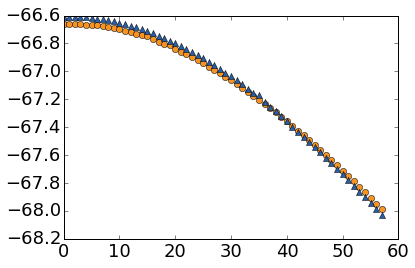

In [147]:
plt.plot(ilm_hydride_energies[:,1],'o')
plt.plot(cubic_hydride_energies[:,1],'^')

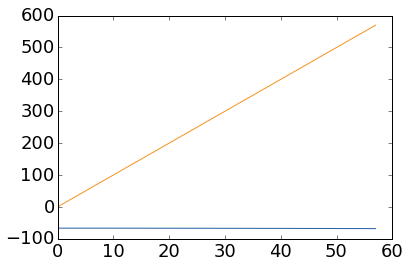

In [125]:
plt.plot(cubic_hydride_energies)

In [128]:
cubic_hydride_energies

array([[   0.        ,  -66.60880949],
       [  10.        ,  -66.60883898],
       [  20.        ,  -66.6092617 ],
       [  30.        ,  -66.61053045],
       [  40.        ,  -66.61285625],
       [  50.        ,  -66.61631865],
       [  60.        ,  -66.62094154],
       [  70.        ,  -66.62672405],
       [  80.        ,  -66.633654  ],
       [  90.        ,  -66.64171357],
       [ 100.        ,  -66.65088232],
       [ 110.        ,  -66.66113817],
       [ 120.        ,  -66.6724584 ],
       [ 130.        ,  -66.68481988],
       [ 140.        ,  -66.6981995 ],
       [ 150.        ,  -66.71257448],
       [ 160.        ,  -66.72792266],
       [ 170.        ,  -66.74422284],
       [ 180.        ,  -66.76145486],
       [ 190.        ,  -66.77959991],
       [ 200.        ,  -66.7986406 ],
       [ 210.        ,  -66.81856113],
       [ 220.        ,  -66.83934725],
       [ 230.        ,  -66.86098649],
       [ 240.        ,  -66.88346813],
       [ 250.        ,  -